In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [265]:
#Set please columns type to be integer
df_c_in = pd.read_excel('countries_in.xlsx', header=1,index_col=1, skiprows=lambda x: x in [210, 211])
df_c_out = pd.read_excel('countries_out.xlsx',  header=1, index_col=1, skiprows=lambda y : y in [2, 138] )

In [266]:


#Dropping unnescesarry column
df_c_in.drop('№ пор.', axis=1, inplace=True)
df_c_in

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Країни,,,,,,,,,,,
Австралія,5224,5769,5706,5880,6161,2761,2840,4156,5743,7397.0,7562
Австрія,27218,27512,28094,30032,30368,17076,19160,21411,30936,30031.0,38230
Азербайджан,66996,77123,85482,101229,111897,69146,75583,105606,96031,96131.0,94362
Аландські о-ви,0,0,0,0,0,0,0,0,0,0.0,1
Албанія,567,427,493,528,575,548,478,549,1366,1853.0,1935
...,...,...,...,...,...,...,...,...,...,...,...
Швейцарія,13266,15303,18802,18677,19576,10290,13302,16408,19876,21374.0,22321
Швеція,16050,16544,19491,40777,17542,10610,14706,20126,24554,30190.0,34231
Шрі-Ланка,299,431,417,322,365,264,230,285,386,975.0,878


In [267]:
#Same to second df
df_c_out.drop('№ пор.', axis=1, inplace=True)
df_c_out

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Країни,,,,,,,,,,,
Австрія,66995,66423,83365,103207,112392,96809,106451,105905,115406,147701,278687
Азербайджан,9687,10447,14144,16424,19538,16791,20814,27238,27386,27287,26345
Албанія,0,27,0,0,0,4,1363,3536,5405,7349,7667
Алжир,0,5,10,0,8,0,25,1,19,272,253
Ангілья,0,0,0,0,0,0,3,0,19,21,0
...,...,...,...,...,...,...,...,...,...,...,...
Чорногорія,12851,20700,34013,39349,48050,37764,26564,28386,40317,35512,35666
Швейцарія,18633,21218,27160,33840,37973,47598,36095,31713,36589,45938,52348
Швеція,4597,4687,12220,10571,113,6351,11503,15570,24215,31145,50878


In [268]:
#count our sum by axis 1 which means by index
#list_o_o =(df_c_in==0).astype(int).sum(axis=1)
#Cut those who are more than 5 zeros cause in my case there are just 11 observations
#list_o_o = list_o_o[list_o_o > 5]
#type(list_o_o)


In [269]:
#works only for DataFrame object
def count_zeros_r(df, shrank=False, num_cut=1):
    #intialize an emty Series object with specific type, by default it would be object
    series_o_o = pd.Series(dtype='int64')
    #Create try exception to manage if not a DataFrame object will be passed
    try:
        #count our sum by axis 1 which means by index
        series_o_o = (df==0).astype(int).sum(axis=1)
        #Shrank help to understand how much columns with zeros we need to choose, by default it keeps 1
        if shrank == True:
            series_o_o = series_o_o[series_o_o > num_cut]
    except:
        print('This function could only manage entry dataset column by column and return Series as a result')
    return series_o_o



In [270]:

#Using function to our dataframe df_c_in
series_in = count_zeros_r(df_c_in, shrank=True, num_cut=5)
series_in 

Країни
Аландські о-ви                    10
Ангілья                           10
Андорра                            9
Антарктида                        10
Антигуа і Барбуда                  9
                                  ..
Фіджі                              9
Французські Південні Території    10
ЦАР                               10
Чад                                9
Ямайка                             9
Length: 91, dtype: int64

In [271]:
#Using function to our dataframe df_c_out
series_out = count_zeros_r(df_c_out, shrank=True, num_cut=6)
series_out

Країни
Ангілья                           8
Аргентина                        10
Бангладеш                         8
Беліз                             9
Бенін                            10
Боснія і Герцеговина              7
Бразилія                          7
Вануату                          10
Гватемала                        10
Гвінея                            9
Гібралтар                        10
Гонконг                           9
Демократична Республіка Конґо     8
Джибуті                           9
Еквадор                          10
Еритрея                          10
Ефіопія                           9
Ємен                              8
Індонезія                         7
Кабо-Верде                       10
Камерун                          10
Кенія                             7
Колумбія                         10
Комори                           10
Конго                             9
Корея Північна (КНДР)            10
Коста-Ріка                       10
Куба                 

In [272]:
#Function for filtering rows with  zeros 
#In case when u want keep df with empty rows set drop_zero to False
def filter_df(df, series, drop_zero=True):
    
    #Comaring Series to DF make a condition
    drop = df.index.isin(series.index)
    if drop_zero==True:
        #New df without rows which contains zero
        new_df = df[drop==False]
    else:
        #If False create df with zero rows
        new_df = df[drop]
    return new_df

In [273]:
#dfff = filter_df(df_c_in, series_in, drop_zero=True)
#dfff

In [274]:
#Aply function and update our data-set
df_c_in=filter_df(df_c_in, series_in)  
df_c_in

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Країни,,,,,,,,,,,
Австралія,5224,5769,5706,5880,6161,2761,2840,4156,5743,7397.0,7562
Австрія,27218,27512,28094,30032,30368,17076,19160,21411,30936,30031.0,38230
Азербайджан,66996,77123,85482,101229,111897,69146,75583,105606,96031,96131.0,94362
Албанія,567,427,493,528,575,548,478,549,1366,1853.0,1935
Алжир,675,677,837,989,1019,796,902,1151,1522,2246.0,2246
...,...,...,...,...,...,...,...,...,...,...,...
Чорногорія,1643,2037,1239,1197,855,2183,1524,1188,1999,1454.0,1347
Швейцарія,13266,15303,18802,18677,19576,10290,13302,16408,19876,21374.0,22321
Швеція,16050,16544,19491,40777,17542,10610,14706,20126,24554,30190.0,34231


In [275]:
#Aply function and update our data-set
df_c_out=filter_df(df_c_out, series_out)  
df_c_out


,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Країни,,,,,,,,,,,
Австрія,66995,66423,83365,103207,112392,96809,106451,105905,115406,147701,278687
Азербайджан,9687,10447,14144,16424,19538,16791,20814,27238,27386,27287,26345
Албанія,0,27,0,0,0,4,1363,3536,5405,7349,7667
Алжир,0,5,10,0,8,0,25,1,19,272,253
Афганістан,1,4,0,0,1,0,29,0,18,2,12
...,...,...,...,...,...,...,...,...,...,...,...
Чорногорія,12851,20700,34013,39349,48050,37764,26564,28386,40317,35512,35666
Швейцарія,18633,21218,27160,33840,37973,47598,36095,31713,36589,45938,52348
Швеція,4597,4687,12220,10571,113,6351,11503,15570,24215,31145,50878


In [276]:
###Its time to ffill our zeros


In [277]:
#Function to ffill zero values column by column 
#In my case i need to ffill values by country but my df contain country as a index and this metod works only by
#columns, so I need to transpose my matrix
#U can chose method which will be more convinient for you, by default it set as bfill
def replacment_z(df, transpose=True, method='bfill'):
    if transpose==True:
        #Transpose method easy to use
        mew = df.T
    else:
        mew = df
    
    mew = mew.replace(to_replace=0, method=method)
    
    return mew.T

In [278]:
#Applying our function without any specification in second call, cause by defualt has been installed needed parameters
df_c_out = replacment_z(df_c_out, method='ffill')
df_c_in = replacment_z(df_c_in)


In [ ]:
#Зробити функцію що буде нарізати топ 20ку року або 10ку або 5 ку
#Функція малювання росту в кожній країні
#Зеркально до іншого датасету можна примінити
 #Вставити функцію яка б приймала або *args або *kwargs та малювала якусь візуалізцію наприклад порівняння двох країн по розподіленню показника скрізь роки

In [261]:
#There is no interesting insides which we could effectively visuzalize 
df_c_in

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Країни,,,,,,,,,,,
Австралія,5224.0,5769.0,5706.0,5880.0,6161.0,2761.0,2840.0,4156.0,5743.0,7397.0,7562.0
Австрія,27218.0,27512.0,28094.0,30032.0,30368.0,17076.0,19160.0,21411.0,30936.0,30031.0,38230.0
Азербайджан,66996.0,77123.0,85482.0,101229.0,111897.0,69146.0,75583.0,105606.0,96031.0,96131.0,94362.0
Албанія,567.0,427.0,493.0,528.0,575.0,548.0,478.0,549.0,1366.0,1853.0,1935.0
Алжир,675.0,677.0,837.0,989.0,1019.0,796.0,902.0,1151.0,1522.0,2246.0,2246.0
...,...,...,...,...,...,...,...,...,...,...,...
Чорногорія,1643.0,2037.0,1239.0,1197.0,855.0,2183.0,1524.0,1188.0,1999.0,1454.0,1347.0
Швейцарія,13266.0,15303.0,18802.0,18677.0,19576.0,10290.0,13302.0,16408.0,19876.0,21374.0,22321.0
Швеція,16050.0,16544.0,19491.0,40777.0,17542.0,10610.0,14706.0,20126.0,24554.0,30190.0,34231.0


In [279]:
#Let's make a new column with cummulative sum for all time   
#df_c_in_sum = df_c_in

#df_c_out_sum = df_c_out
#df_c_in_sum['Cum_sum'] = df_c_in.loc[:].sum(axis = 1)
#df_c_out_sum['Cum_sum'] = df_c_out.loc[:].sum(axis=1)
#df_c_in

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Країни,,,,,,,,,,,
Австралія,5224.0,5769.0,5706.0,5880.0,6161.0,2761.0,2840.0,4156.0,5743.0,7397.0,7562.0
Австрія,27218.0,27512.0,28094.0,30032.0,30368.0,17076.0,19160.0,21411.0,30936.0,30031.0,38230.0
Азербайджан,66996.0,77123.0,85482.0,101229.0,111897.0,69146.0,75583.0,105606.0,96031.0,96131.0,94362.0
Албанія,567.0,427.0,493.0,528.0,575.0,548.0,478.0,549.0,1366.0,1853.0,1935.0
Алжир,675.0,677.0,837.0,989.0,1019.0,796.0,902.0,1151.0,1522.0,2246.0,2246.0
...,...,...,...,...,...,...,...,...,...,...,...
Чорногорія,1643.0,2037.0,1239.0,1197.0,855.0,2183.0,1524.0,1188.0,1999.0,1454.0,1347.0
Швейцарія,13266.0,15303.0,18802.0,18677.0,19576.0,10290.0,13302.0,16408.0,19876.0,21374.0,22321.0
Швеція,16050.0,16544.0,19491.0,40777.0,17542.0,10610.0,14706.0,20126.0,24554.0,30190.0,34231.0


In [280]:
#Function for comparing top of country by inward and outward movements 
#Top could be chosen by any column 
#Allso function allows to return only top as single dataframe only with choseen column by which top has been made
def filter_to_top(df, col, ascending=False, top_num=10, single=False):
    df_fil = df.sort_values(by=col, ascending=ascending)
    df_fil = df_fil.iloc[:top_num]
    
    if single==True:
        Single = df_fil[[col]]
        return Single
    else:
        return df_fil
    
    

In [281]:
#Simple function for visualizing filtered data 
# by-country argument allows to choose how we want visualize cause in my case is needed to make transponse to matrix
def visualize_me(df, col, kind='scatter', by_country=False):
    
    if by_country==False:
        sns.relplot(x=df.index , y=col, data=df, kind=kind)
        plt.xticks(rotation=65)
    else:
        df_t = df.T
        sns.relplot(x=df_t.index , y=col, data=df_t, kind=kind)

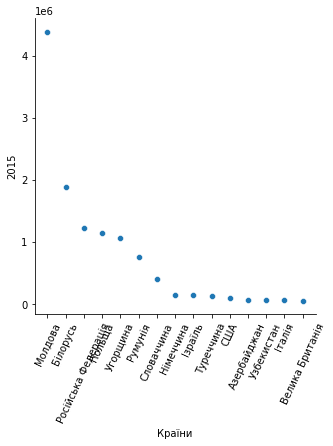

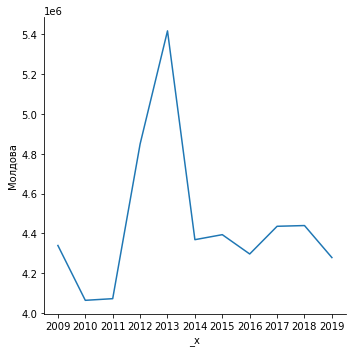

In [286]:
#Let's review how it's works

df_c = filter_to_top(df_c_in, '2015',ascending = False, top_num=15, single=True) 

visualize_me(df_c, '2015', 'scatter')
visualize_me(df_c_in, 'Молдова', kind='line', by_country=True)


In [ ]:

    #As we have simple data set - no interesting insides are in there
    #It's stems that i do not want to make colorful visualization, not this time
    #Thus, it's end, at least it was good practice of function creating, as simple as this data is